# Tobig's 21기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크다운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [7]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [8]:
# parameter 개수
N = len(X_train.loc[0])

In [9]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.83380838, 0.42631419, 0.57306185])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X \cdot Y$

In [10]:
## X 와 Y를 받아서 내적한 z를 return 합니다

def dot_product(X, parameters):
    z = np.dot(X,parameters)
    return z

## Logistic Function

## $p = f(x; \theta) = \frac{1}{1 + e^{-(  \theta \cdot x)}}$

In [11]:
def logistic(X, parameters):
    p = 1 / (1 + np.exp(-1 * dot_product(X,parameters)))
    return p

In [12]:
logistic(X_train.iloc[1], parameters)

0.7964783310132815

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$. 1/2 은 계산상의 편의를 위해 곱합니다
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 sum 형태까지만 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = \sum_{i=1}^{n} \left[ y_i \log(f(x_i; \theta)) + (1-y_i) \log(1 - f(x_i; \theta)) \right]$

In [13]:
def minus_log_cross_entropy_i(X, y, parameters):
    prob = logistic(X,parameters)
    loss = - (y * np.log(prob) + (1 - y) * np.log(1 - prob))

    return loss

## CE

In [14]:
def mse_i(X, y, parameters):
    prob = logistic(X,parameters)
    loss = (y- prob) ** 2
    return loss

## MSE

In [15]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n: 현재 배치의 데이터 수
    loss = 0
    for i in range(len(X_set)):
        loss += loss_function(X_set.iloc[0], y_set.iloc[0], parameters)
    loss = loss/n #loss 평균값으로 계산
    return loss

In [16]:
batch_loss(X_test, y_test, parameters, mse_i, len(X_test))

0.2275308369684297

In [17]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

0.648177496643954

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= - \Sigma(y_i - \theta^{T} \cdot X_{i}) \cdot X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)= - \sum_{i=1}^{n} [( y_i - p_i) \cdot x_{ij} ]$

In [18]:
def get_gradient_ij(X, y, parameters, j, model):
    gradient_j = 0
    if model == 'linear':

        gradient_j -= np.dot((y - np.dot(parameters,X)),X[j])
    else:

        gradient_j -= np.dot((y-logistic(X,parameters)), X[j])
    return gradient_j

In [19]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 0, 'linear')

-0.7412917987982689

In [20]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.08186148193217027

In [21]:
from IPython.display import Image

Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

FileNotFoundError: No such file or directory: 'C:/Users/rhskr/Desktop/배치알고리즘_구현.png'

<IPython.core.display.Image object>

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [22]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]

    for j in range(len(parameters)): ## j번째 열에 대해
        for i in range(len(X_set)): ## i번만큼 반복
            partial_gradient = get_gradient_ij(X_set.iloc[i], y_set.iloc[i], parameters, j, model)
            gradients[j] += partial_gradient
    return gradients

In [23]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'linear')
gradients1

[83.07125635413709, 109.67569647608832, 147.47922365238398]

In [24]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[57.98475344046552, 6.1803533200702025, 38.92097215648913]

## mini-batch
인덱스로 미니 배치 나누기

In [25]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:
- 전체 데이터를 주어진 배치의 크기로 나눈 미니배치를 만든다 그리고 그에 해당하는 인덱스의 리스트를 반환하여 추후 훈련시 미니배치만큼 훈련할 수 있게 한다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [26]:
def step(parameters, gradients, learning_rate, n): #n: 현재 배치의 데이터 수

    for i in range(len(parameters)): ## 파라미터 개수 받아오기
        parameters[i] -=  learning_rate * gradients[i] # 더해주기

    return parameters

In [27]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.25396084, 0.36451065, 0.18385213])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 파라미터를 업데이트를 할 떄 얼마나 업데이트를 할 지 정해주는 정도  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 파라미터를 한 번 업데이트할 때 사용되는 데이터의 수
- epoch: 전체 데이터를 다 학습하는 과정
- num_epoch: 전체 학습과정에서 반복되는 총 에포크의 횟수
<br>

BGD: 전체 데이터 세트에 대해 그래디언트를 계산하여 업데이트
SGD: 각 데이터 포인트 하나를 무작위로 선택해 이에 대해 그래디언트를 계산하고 업데이트
MGD: "..."  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD  
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [51]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False

    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)




    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]



            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))

            #중단 조건

            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, len(X_batch))

            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss

        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")

    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수를 찾아보세요. 학습을 진행할 때, hyperparameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

default: learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16

In [49]:
new_param_bgd = gradient_descent(X_train, y_train,  learning_rate = 0.1, batch_size=X_train.shape[0])
new_param_bgd

epoch: 0  loss: 0.9467329725218107  params: [-0.019227    0.0530918   0.39047857]  gradients: [47.04490312838773, 3.0874493864352033, 40.73293107785537]
epoch: 100  loss: 0.05879855539069093  params: [-1.62432638  3.47583067 -3.30203903]  gradients: [0.28042473834972026, -0.9230055722824497, 0.8629148092047706]
epoch: 200  loss: 0.036529319198978755  params: [-1.78207312  3.99143487 -3.78142038]  gradients: [0.08415835646069644, -0.2734880650814755, 0.25293814927753955]
epoch: 300  loss: 0.03127482038367044  params: [-1.83412125  4.16030317 -3.93733527]  gradients: [0.030273495450640772, -0.09807283483455631, 0.0904012826552135]
epoch: 400  loss: 0.029534620798322055  params: [-1.85337678  4.22264875 -3.9947689 ]  gradients: [0.01150398451137953, -0.03722810343642813, 0.03427463996080631]


array([-1.85349072,  4.22301749, -3.99510839])

In [30]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 9.21114992672977  params: [-0.88024762  1.08948069 -1.21284502]  gradients: [0.25052314089958, 0.13633493289494097, 0.17626576254099052]


array([-1.61116489,  3.68276506, -3.53353845])

In [31]:
new_param_mgd = gradient_descent(X_train, y_train)
new_param_mgd

epoch: 0  loss: 1.6064403408076295  params: [-0.9220173   1.02290111 -1.21616843]  gradients: [0.8991656334974383, 0.9830186037951325, 1.5135144146757538]


array([-1.80164686,  4.24179118, -3.76630299])

### Predict Label

In [33]:
# bgd 활용하여 학습한 parameters로 예측
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)

# 초기에 설정한 random parameters로 예측
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [34]:
from sklearn.metrics import *

In [35]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 1,  9]])

In [36]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.94


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [37]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [38]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [39]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.50163723, 2.97161671])

In [42]:
y_train

71     1
124    1
184    1
97     0
149    0
      ..
67     1
192    0
117    0
47     0
172    0
Name: Label, Length: 150, dtype: int64

In [41]:
X_train

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974
...,...,...,...
145,1,0.686724,-0.087949
146,1,0.009739,0.505706
147,1,0.793616,1.363207
148,1,1.007401,0.835514


In [44]:
y

0      2.289152
1      4.371358
2      1.563885
3      0.195439
4      1.468027
         ...   
145    2.820660
146    1.751371
147    2.793356
148    0.801102
149    1.463895
Length: 150, dtype: float64

In [54]:
#경사하강법
new_param = gradient_descent(X, y, learning_rate=0.01, model = 'linear')
new_param

epoch: 0  loss: 2.5278106904605693  params: [1.14374356 1.50913407]  gradients: [-1.1937874528896018, -0.5318586653592392]
epoch: 100  loss: 2.4604031596715985  params: [0.51435933 2.98392959]  gradients: [-0.8969251938258358, 0.07158805306276861]
epoch: 200  loss: 2.460402635452834  params: [0.51433389 2.98397684]  gradients: [-0.8969497780052635, 0.0715917751377938]
epoch: 300  loss: 2.4604026354352055  params: [0.51433389 2.98397684]  gradients: [-0.8969497788320164, 0.07159177526296423]
epoch: 400  loss: 2.4604026354352047  params: [0.51433389 2.98397684]  gradients: [-0.8969497788320426, 0.07159177526296867]
epoch: 500  loss: 2.4604026354352047  params: [0.51433389 2.98397684]  gradients: [-0.8969497788320426, 0.07159177526296867]
epoch: 600  loss: 2.4604026354352047  params: [0.51433389 2.98397684]  gradients: [-0.8969497788320426, 0.07159177526296867]
epoch: 700  loss: 2.4604026354352047  params: [0.51433389 2.98397684]  gradients: [-0.8969497788320426, 0.07159177526296867]
epoc

array([0.51433389, 2.98397684])

In [55]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

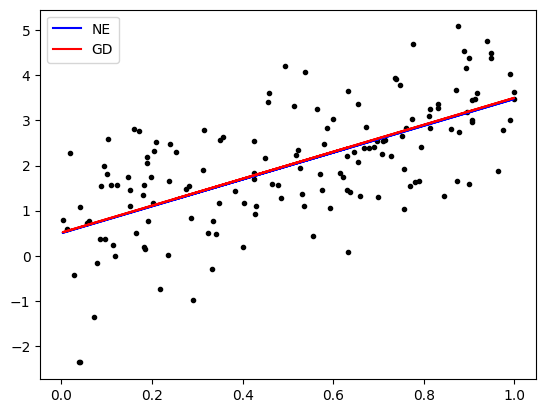

In [56]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()